In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [424]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [425]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Применим к столбцу DistrictId тип данных object, так как районы города обычно не имеют числовую градацию

In [426]:
train['DistrictId'] = train['DistrictId'].astype('object')

In [427]:
train.describe()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Можно выделить следующие недостатки в датафрейме: 
    1) Пропущены данные в столбцaх 'LifeSquare', 'Healthcare_1'
    2) Некоторые значения в столбце 'LifeSquare' превышают значение в столбце 'Square', 
    что скорее всего говорит о том, что значения перепутаны между собой
    3) Слишком большие значения в столбцах 'LifeSquare', 'KitchenSquare', 'HouseYear'
    4) Значения в столбцах 'Ecology_2','Ecology_3', 'Shop_2' представлены объектами. Необходим перевод в цифровой тип данных.

Сравним столбцы 'Square' и 'LifeSquare'. Значения во втором столбце не должны превышать общую площадь квартиры.

In [428]:
train[['Square','LifeSquare']].loc[train['Square']<train['LifeSquare']].head()

,Square,LifeSquare
28,42.530043,43.967759
44,104.211396,106.340403
52,61.400054,65.224603
123,85.952306,89.803753
153,51.831473,53.491301


Проверяем общую площадь квартиры, там где жилая площадь подозрительно большая.

In [429]:
train[['Square','LifeSquare']].loc[train['LifeSquare'] == train['LifeSquare'].max()]

,Square,LifeSquare
4328,81.694417,7480.592129


Заменим значение в 'LifeSquare'. Скорее всего, запятую, отделяющую дробную часть, поставили не там.

In [430]:
train.loc[train['LifeSquare'] == train['LifeSquare'].max(), 'LifeSquare'] = 74.80592129

Поменяем местами перепутанные значения в 'LifeSquare' и 'Square'

In [431]:
SQ = train.loc[train['Square'] < train['LifeSquare'],['Square','LifeSquare']]
a = SQ['Square']
b = SQ['LifeSquare']
train.loc[train['Square'] < train['LifeSquare'], 'LifeSquare'] = a
train.loc[train['Square'] == train['LifeSquare'], 'Square'] = b

Возможны ошибки, когда этаж квартиры указан больше, чем этажность дома. Проверяем.

In [432]:
train.loc[train['HouseFloor'] < train['Floor'],['HouseFloor','Floor']].head()

,HouseFloor,Floor
7,0.0,14
14,4.0,5
16,5.0,6
21,1.0,15
23,0.0,2


Возможно при заполнении их просто перепутали. Поменяем местами перепутанные значения Floor и HouseFloor

In [433]:
HF = train.loc[train['HouseFloor'] < train['Floor'],['HouseFloor','Floor']].index
c = train['HouseFloor'][HF].values
d = train['Floor'][HF].values
train.loc[HF, 'HouseFloor'] = d
train.loc[HF,'Floor'] = c

Проверим подозрительно высокое значение площади кухни

In [434]:
train.loc[train['KitchenSquare'] > train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,1.0,4.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9.0,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4.0,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,1.0,6.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


Понятно, что тоже есть ошибки - где-то вбит год, а где-то надо сдвинуть запятую на порядок. 
Применим ко всем один метод, погрешность будет небольшая.

Дальше мы видим пропущенные значения в столбце 'LifeSquare'

In [435]:
train['LifeSquare'].loc[train['LifeSquare'].isnull()].head()

7    NaN
8    NaN
21   NaN
23   NaN
25   NaN
Name: LifeSquare, dtype: float64

Построим линейную регрессию, чтобы заполнить пропущенные значения в LifeSquare

In [436]:
lr = LinearRegression()
SQ_notnull = np.array(train.loc[train['LifeSquare'].notnull(),'Square'])
LS_notnull = np.array(train.loc[train['LifeSquare'].notnull(),'LifeSquare'])
SQ_isnull = np.array(train.loc[train['LifeSquare'].isnull(),'Square'])

SQ_notnull = SQ_notnull.reshape(-1,1)
LS_notnull = LS_notnull.reshape(-1,1)
SQ_isnull = SQ_isnull.reshape(-1,1)

lr.fit(SQ_notnull,LS_notnull)
LS_isnull = lr.predict(SQ_isnull)
train.loc[train['LifeSquare'].isnull(),'LifeSquare'] = LS_isnull

Применим тот же метод к выбросам из KitchenSquare

In [437]:
SQ1 = np.array(train['Square']).reshape(-1,1)
KTC1 = np.array(train['KitchenSquare']).reshape(-1,1)
SQ2 = np.array(train.loc[train['KitchenSquare'] > train['Square'], 'Square']).reshape(-1,1)
lr.fit(SQ1,KTC1)
KTC2 = lr.predict(SQ2)
train.loc[train['KitchenSquare'] > train['Square'], 'KitchenSquare'] = KTC2

Посмотрим как подобрались значения на графике. Для этого создадим функцию

In [438]:
def draw_plot(title1,title2,label1,label2,arg1,arg2,arg3,arg4):
    fig,ax = plt.subplots(nrows=1,ncols=2)
    ax1,ax2 = ax.flatten()
    ax1.set_title(title1)
    ax1.scatter(arg1,arg2)
    ax2.set_title(title2)
    ax2.scatter(arg3,arg4)
    fig.set_size_inches(13,4)
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.subplots_adjust(wspace=2, hspace=0.3)
    plt.show()

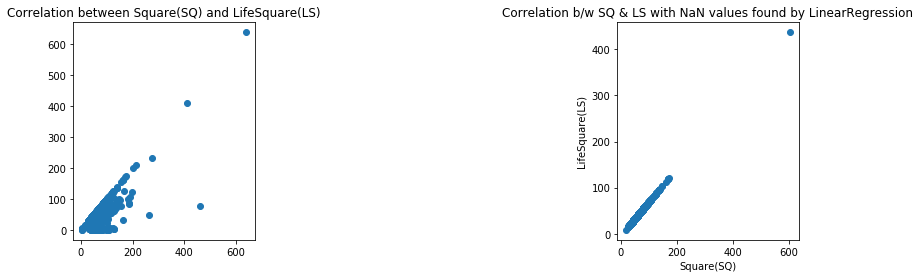

In [439]:
draw_plot('Correlation between Square(SQ) and LifeSquare(LS)','Correlation b/w SQ & LS with NaN values found by LinearRegression', 'Square(SQ)', 'LifeSquare(LS)', SQ_notnull, LS_notnull, SQ_isnull, LS_isnull)

То же самое посмотрим и для KitchenSquare

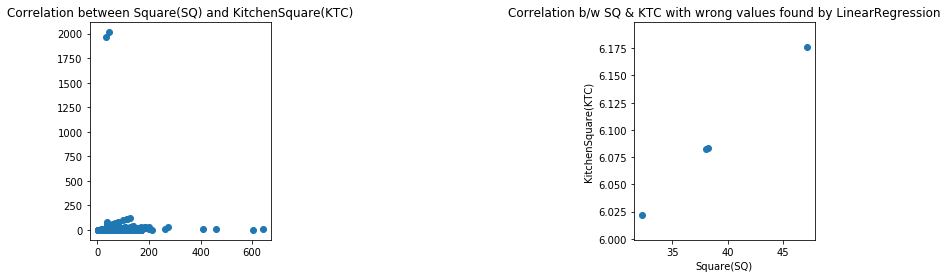

In [440]:
draw_plot('Correlation between Square(SQ) and KitchenSquare(KTC)','Correlation b/w SQ & KTC with wrong values found by LinearRegression', 'Square(SQ)', 'KitchenSquare(KTC)', SQ1, KTC1, SQ2, KTC2)

Заменим во всем датасете буквенные обозначения на числовые, чтобы данные можно было легче обработать

In [441]:
train = train.replace(['A','B'],[1,0])

Чтобы совсем не выкидывать столбец Healthcare_1 примем отсутствующие значения за 0

In [442]:
train.loc[train['Healthcare_1'].isnull(), 'Healthcare_1'] = 0

# Те же самые действия повторим и для таблицы test

In [443]:
test['DistrictId'] = test['DistrictId'].astype('object')

In [444]:
test[['Square','LifeSquare']].loc[test['Square']<test['LifeSquare']].head()

,Square,LifeSquare
2,13.597819,15.948246
27,48.610661,48.752502
39,42.413793,42.434887
43,37.484057,40.593036
70,52.449057,52.798349


In [445]:
SQ = test.loc[test['Square'] < test['LifeSquare'],['Square','LifeSquare']]
a = SQ['Square']
b = SQ['LifeSquare']
test.loc[test['Square'] < test['LifeSquare'], 'LifeSquare'] = a
test.loc[test['Square'] == test['LifeSquare'], 'Square'] = b

In [446]:
test.loc[test['HouseFloor'] < test['Floor'],['HouseFloor','Floor']].head()

,HouseFloor,Floor
1,1.0,6
10,9.0,10
14,1.0,5
22,0.0,8
24,0.0,3


In [447]:
HF = test.loc[test['HouseFloor'] < test['Floor'],['HouseFloor','Floor']].index
c = test['HouseFloor'][HF].values
d = test['Floor'][HF].values
test.loc[HF, 'HouseFloor'] = d
test.loc[HF,'Floor'] = c

In [448]:
test.loc[test['KitchenSquare'] > test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,620.0,11.0,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
2424,10662,29,1.0,25.956829,17.251768,33.0,5.0,5.0,1973,0.069660,B,B,31,6119,4,NaN,1,2,B
3863,3194,29,2.0,43.926987,31.028707,44.0,5.0,6.0,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B
4555,12640,6,2.0,54.629142,31.486308,97.0,4.0,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [449]:
test['LifeSquare'].loc[test['LifeSquare'].isnull()].head()

1    NaN
5    NaN
11   NaN
14   NaN
21   NaN
Name: LifeSquare, dtype: float64

In [450]:
SQ_notnull = np.array(test.loc[test['LifeSquare'].notnull(),'Square'])
LS_notnull = np.array(test.loc[test['LifeSquare'].notnull(),'LifeSquare'])
SQ_isnull = np.array(test.loc[test['LifeSquare'].isnull(),'Square'])

SQ_notnull = SQ_notnull.reshape(-1,1)
LS_notnull = LS_notnull.reshape(-1,1)
SQ_isnull = SQ_isnull.reshape(-1,1)

lr.fit(SQ_notnull,LS_notnull)
LS_isnull = lr.predict(SQ_isnull)
test.loc[test['LifeSquare'].isnull(),'LifeSquare'] = LS_isnull

In [451]:
SQ1 = np.array(test['Square']).reshape(-1,1)
KTC1 = np.array(test['KitchenSquare']).reshape(-1,1)
SQ2 = np.array(test.loc[test['KitchenSquare'] > test['Square'], 'Square']).reshape(-1,1)
lr.fit(SQ1,KTC1)
KTC2 = lr.predict(SQ2)
test.loc[test['KitchenSquare'] > test['Square'], 'KitchenSquare'] = KTC2

In [452]:
test = test.replace(['A','B'],[1,0])

In [453]:
test.loc[test['Healthcare_1'].isnull(), 'Healthcare_1'] = 0

Изменим размер тренировочных данных, чтобы они соответствовали тестовым

In [454]:
train_df = train.iloc[:,:19]

# Прогоним тестовый датасет через модели

In [455]:
train.Price = np.array(train.Price).reshape(-1,1)
lr.fit(train_df, train.Price)
lr.predict(test)

array([182728.8927172 , 199424.33655757, 232728.21445334, ...,
       341045.42465485, 183103.86638749, 226709.49429694])

In [456]:
model_rfr = RandomForestRegressor(n_estimators=1000, max_depth=19, random_state=19)
model_rfr.fit(train_df, train.Price)
prediction = model_rfr.predict(test)
prediction

array([156559.75913706, 217462.65580112, 208860.0507624 , ...,
       328571.15025767, 207246.34325407, 172701.96837086])

In [457]:
model = GradientBoostingRegressor(n_estimators=1000, max_depth=19, random_state=19)
model.fit(train_df, train.Price)
model.predict(test)

array([164707.4607777 , 246680.29006077, 241205.27063386, ...,
       326982.01767973, 217227.97145418, 174845.68895295])

In [458]:
model_dtr = DecisionTreeRegressor(max_depth=19, random_state=19)
model_dtr.fit(train_df, train.Price)
model_dtr.predict(test)

array([163653.73769771, 246684.18590771, 268256.96660046, ...,
       386301.97709449, 193208.61301525, 190937.29400374])

Оценим эффективность моделей, разделив тренировочный датасет

In [459]:
X_train,X_test,y_train,y_test=train_test_split(train_df,train.Price,test_size=0.2)
model_rfr.fit(X_train, y_train)
r2_score(y_test, model_rfr.predict(X_test))

0.7507121172287574

In [460]:
model_dtr.fit(X_train, y_train)
r2_score(y_test, model_dtr.predict(X_test))

0.4069773042290571

In [461]:
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

0.5360784728438245

In [462]:
lr.fit(X_train, y_train)
r2_score(y_test, lr.predict(X_test))

0.4255581142050514

# Выбор пал на модель RandomForestRegressor, как на имеющую наиболее сбалансированные предсказания.

In [463]:
predictions = pd.DataFrame(prediction)
predictions.to_csv('DObozhgeev_predictions.csv')